In [74]:
import mediapipe as mp
import cv2 as cv2

In [75]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [76]:
# For static images:
IMAGE_FILES = [
  "/Users/alp/Desktop/ComputationalLinguistics/Mediapipe/PeoplePictures/person5.jpeg",
]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.4769090712070465
  y: 0.7316391468048096
  z: -0.06287597864866257
}
landmark {
  x: 0.4570218324661255
  y: 0.6335744261741638
  z: -0.12741783261299133
}
landmark {
  x: 0.46997949481010437
  y: 0.6582164764404297
  z: -0.0639144629240036
}
landmark {
  x: 0.445008248090744
  y: 0.5503168106079102
  z: -0.0934346541762352
}
landmark {
  x: 0.45530104637145996
  y: 0.6080517768859863
  z: -0.13707415759563446
}
landmark {
  x: 0.4588167369365692
  y: 0.5744579434394836
  z: -0.12918032705783844
}
landmark {
  x: 0.4725423753261566
  y: 0.49249738454818726
  z: -0.0712175965309143
}
landmark {
  x: 0.3342065215110779
  y: 0.480268657207489
  z: 0.07390595227479935
}
landmark {
  x: 0.47569671273231506
  y: 0.43862849473953247
  z: -0.061164382845163345
}
landmark {
  x: 0.4743226170539856
  y: 0.4062628746032715
  z: -0.0689690038561821
}
landmark {
  x: 0.4792248606681824
  y: 0.2690841555595398
  z: -0.04926750808954239
}
landmark {
  x: 0.4774064421

In [77]:
landmarks = results.multi_face_landmarks[0].landmark

In [78]:
import numpy as np

landmarks_plot = []
for landmark in landmarks:
    landmarks_plot.append([landmark.x, landmark.y, landmark.z])
landmarks_plot = np.array(landmarks_plot)
landmarks_plot

array([[ 0.47690907,  0.73163915, -0.06287598],
       [ 0.45702183,  0.63357443, -0.12741783],
       [ 0.46997949,  0.65821648, -0.06391446],
       ...,
       [ 0.62491119,  0.44946128, -0.02294908],
       [ 0.60011446,  0.46937406, -0.02294908],
       [ 0.62356949,  0.4902606 , -0.02294908]])

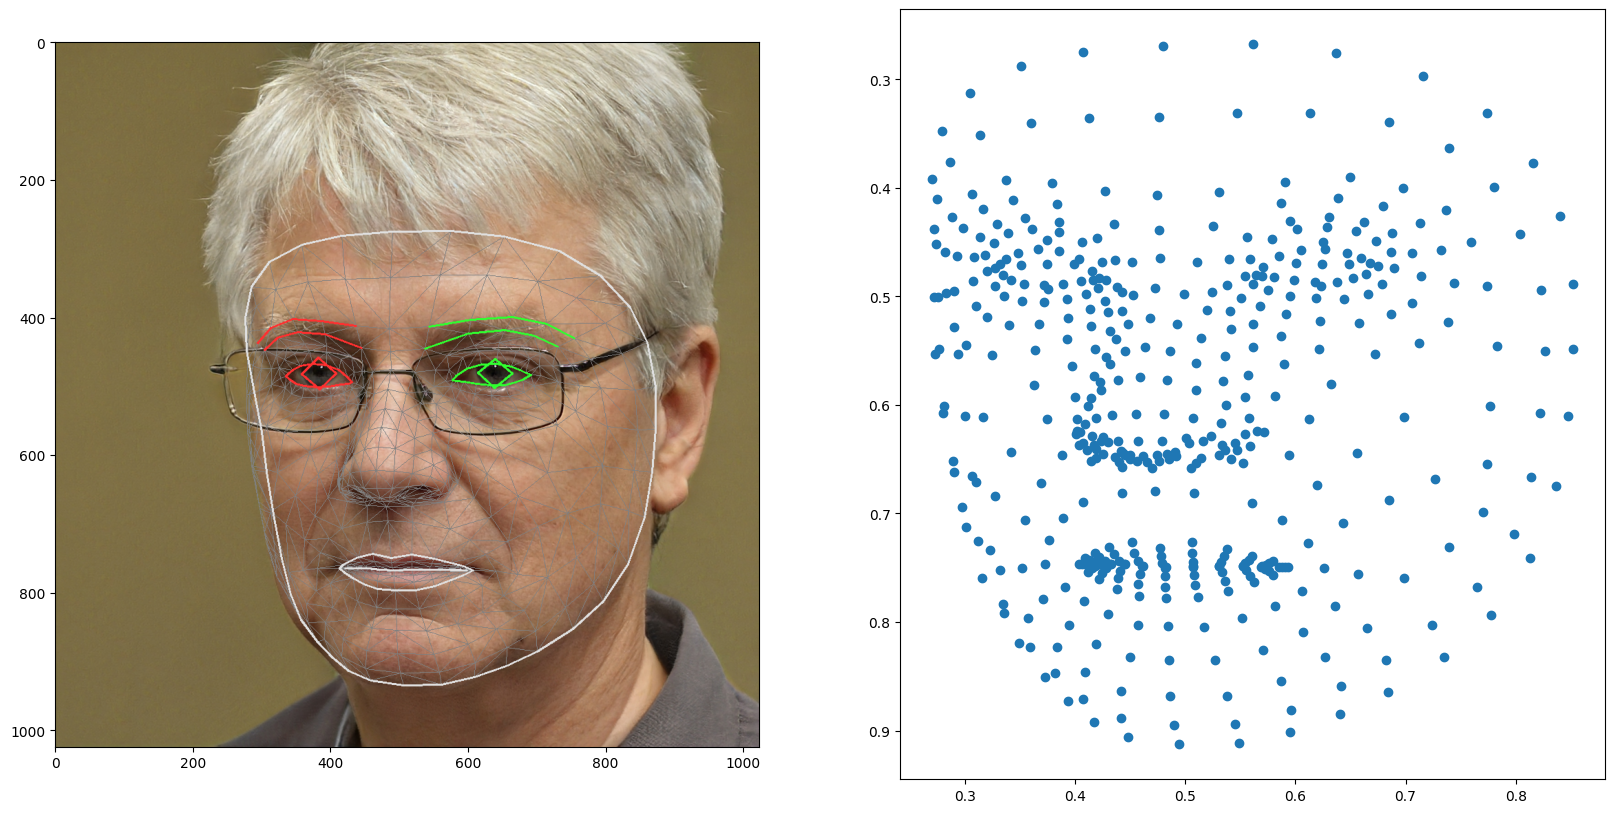

In [79]:
import matplotlib.pyplot as plt
import numpy as np
figure, axis = plt.subplots(1, 2, figsize=(20, 10))
axis[0].imshow((cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)))
axis[1].scatter(landmarks_plot[:, 0], landmarks_plot[:, 1])

plt.gca().invert_yaxis()
plt.show()

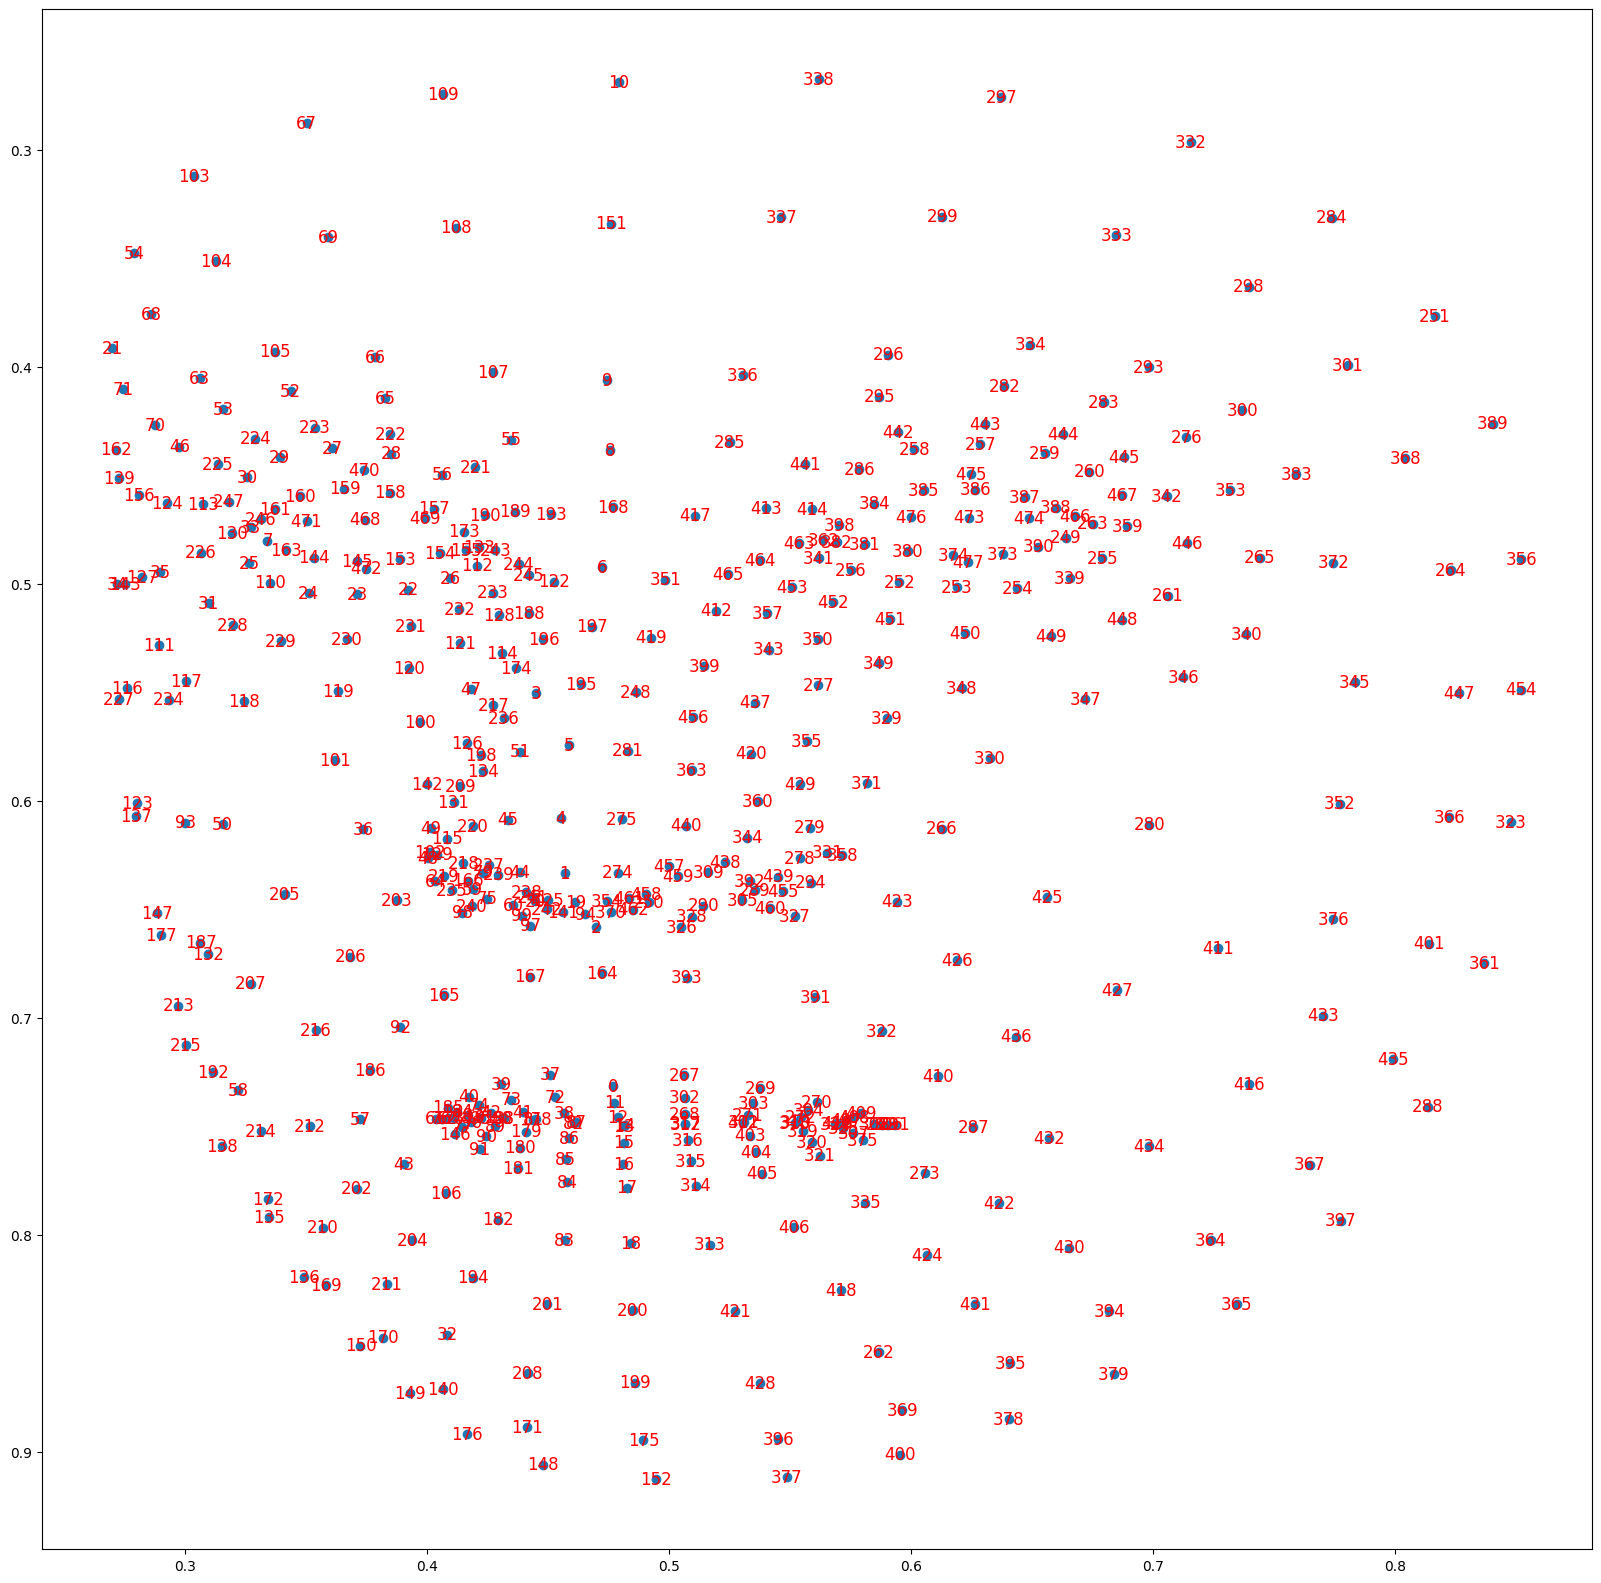

In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plt.scatter(landmarks_plot[:,0], landmarks_plot[:,1])
plt.gca().invert_yaxis()

for i, landmark in enumerate(landmarks_plot):
    plt.annotate(i, (landmark[0], landmark[1]), fontsize=12, ha='center', va='center', color='red')

plt.show()

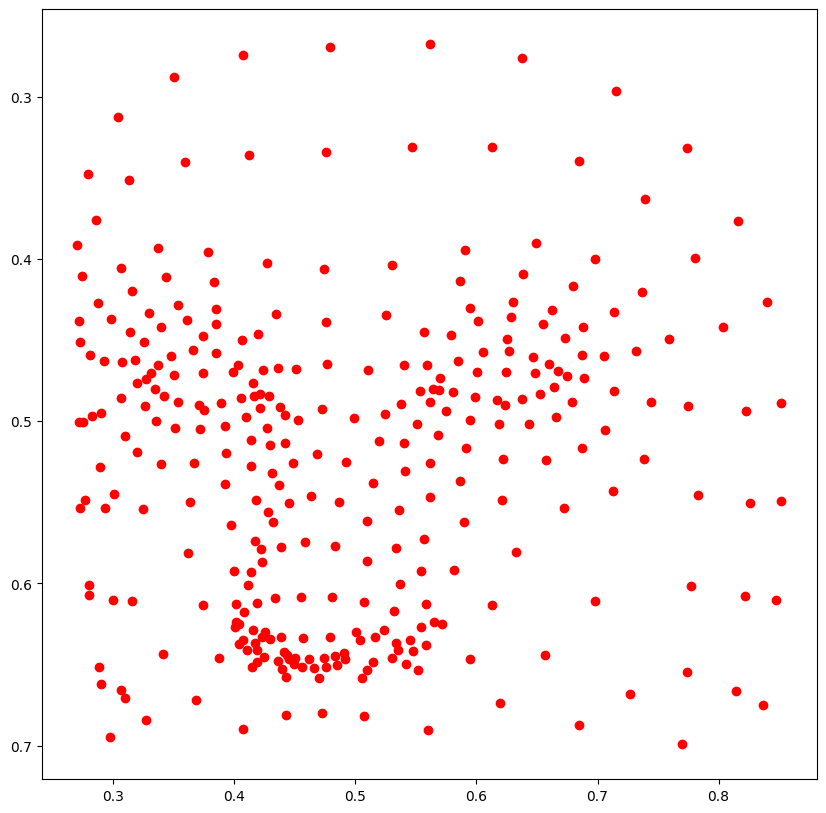

In [81]:
# create a scatter plot of the point above the 0.7 threshold of the y axis
plt.figure(figsize=(10,10))
y_threshold = 0.7
x_threshold = [0.3, 0.7]
plt.scatter(landmarks_plot[landmarks_plot[:,1] < y_threshold,0], landmarks_plot[landmarks_plot[:,1] < y_threshold,1], color='red') 
plt.gca().invert_yaxis()

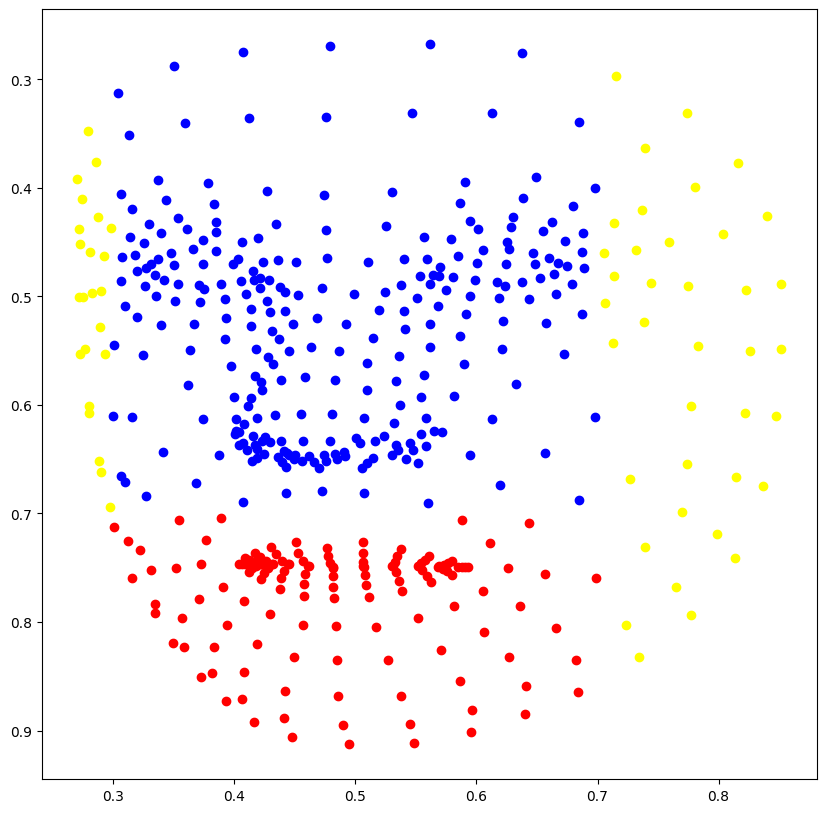

In [82]:
plt.figure(figsize=(10,10))
y_threshold = 0.7
x_threshold = [0.3, 0.7]

# Select the points above the y threshold and within the x threshold
above_y_and_within_x = (landmarks_plot[:,1] > y_threshold) & (landmarks_plot[:,0] >= x_threshold[0]) & (landmarks_plot[:,0] <= x_threshold[1])
plt.scatter(landmarks_plot[above_y_and_within_x,0], landmarks_plot[above_y_and_within_x,1], color='red')

# Select the points below the y threshold and within the x threshold
below_y_and_within_x = (landmarks_plot[:,1] < y_threshold) & (landmarks_plot[:,0] >= x_threshold[0]) & (landmarks_plot[:,0] <= x_threshold[1])
plt.scatter(landmarks_plot[below_y_and_within_x,0], landmarks_plot[below_y_and_within_x,1], color='blue')

# Select the points outside the x threshold
outside_x = (landmarks_plot[:,0] < x_threshold[0]) | (landmarks_plot[:,0] > x_threshold[1])
plt.scatter(landmarks_plot[outside_x,0], landmarks_plot[outside_x,1], color='yellow')

plt.gca().invert_yaxis()


In [83]:
interest_ponits = landmarks_plot[below_y_and_within_x]
interest_ponits

array([[ 0.45702183,  0.63357443, -0.12741783],
       [ 0.46997949,  0.65821648, -0.06391446],
       [ 0.44500825,  0.55031681, -0.09343465],
       [ 0.45530105,  0.60805178, -0.13707416],
       [ 0.45881674,  0.57445794, -0.12918033],
       [ 0.47254238,  0.49249738, -0.0712176 ],
       [ 0.33420652,  0.48026866,  0.07390595],
       [ 0.47569671,  0.43862849, -0.06116438],
       [ 0.47432262,  0.40626287, -0.068969  ],
       [ 0.47922486,  0.26908416, -0.04926751],
       [ 0.4613378 ,  0.64663744, -0.11429103],
       [ 0.444886  ,  0.64631283, -0.07568624],
       [ 0.39232048,  0.50276351,  0.03349411],
       [ 0.37135014,  0.50472212,  0.04118265],
       [ 0.35121378,  0.50430095,  0.05330696],
       [ 0.32660246,  0.49046415,  0.08081255],
       [ 0.40977019,  0.49745709,  0.02864956],
       [ 0.36088341,  0.43760353,  0.02731213],
       [ 0.38530827,  0.44017231,  0.01940581],
       [ 0.33919746,  0.44173253,  0.04154746],
       [ 0.32585323,  0.45103317,  0.055

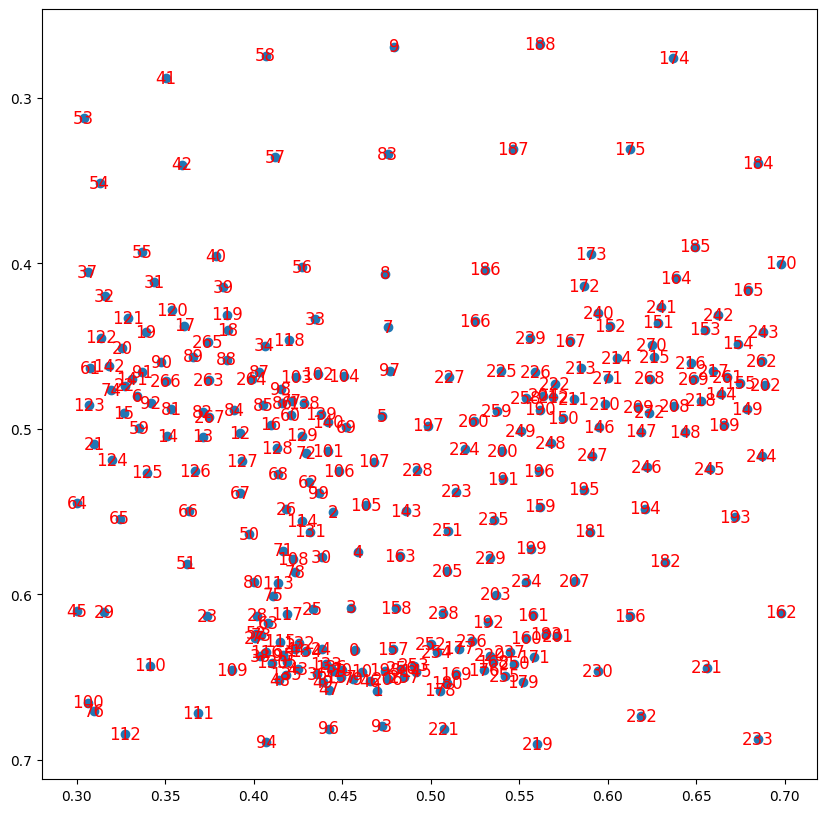

In [84]:
plt.figure(figsize=(10,10))
interest_plot = plt.scatter(interest_ponits[:,0], interest_ponits[:,1])
for i, landmark in enumerate(interest_ponits):
    plt.annotate(i, (landmark[0], landmark[1]), fontsize=12, ha='center', va='center', color='red')
plt.gca().invert_yaxis()

In [85]:
import plotly.express as px

fig = px.scatter(
x=interest_ponits[:,0], 
y=interest_ponits[:,1]
)
fig.update_yaxes(autorange="reversed")

fig.update_layout(
title="Interest Points",
xaxis_title="x",
yaxis_title="y",
font=dict(
family="Courier New, monospace",
size=18,
color="#7f7f7f"
),
width=600,
height=600
)

fig.show()

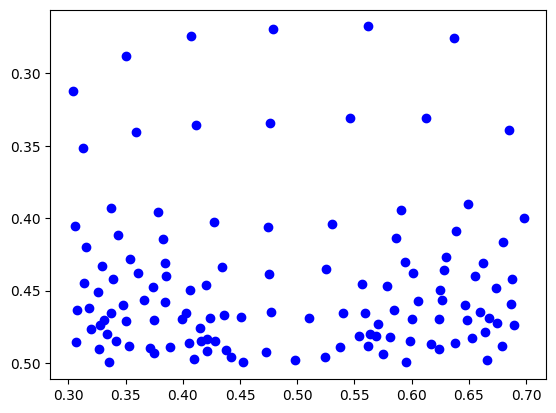

In [86]:
y_threshold = [0.5]
x_threshold = [0.3, 0.7]

# Select the points below the y threshold and within the x threshold using interest points
below_y_and_within_x = (interest_ponits[:,1] < y_threshold) &  (interest_ponits[:,0] >= x_threshold[0]) & (interest_ponits[:,0] <= x_threshold[1])
plt.gca().invert_yaxis()
plt.scatter(interest_ponits[below_y_and_within_x,0], interest_ponits[below_y_and_within_x,1], color='blue')

In [87]:
fig = px.scatter(
x=interest_ponits[below_y_and_within_x,0], 
y=interest_ponits[below_y_and_within_x,1]
)
fig.update_yaxes(autorange="reversed")

fig.update_layout(
title="Interest Points",
xaxis_title="x",
yaxis_title="y",
font=dict(
family="Courier New, monospace",
size=18,
color="#7f7f7f"
),
width=600,
height=600
)

fig.show()

Here is the final plot to get the biggest eye information

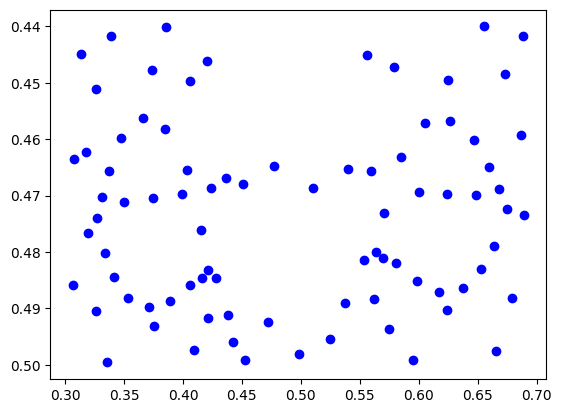

In [88]:
y_threshold = [0.5, 0.44]
x_threshold = [0.3, 0.7]
within_y_and_within_x = (interest_ponits[:,1] <= y_threshold[0]) & (interest_ponits[:,1] >= y_threshold[1]) & (interest_ponits[:,0] >= x_threshold[0]) & (interest_ponits[:,0] <= x_threshold[1])
plt.gca().invert_yaxis()
plt.scatter(interest_ponits[within_y_and_within_x,0], interest_ponits[within_y_and_within_x,1], color='blue')


In [89]:
fig = px.scatter(
x=interest_ponits[within_y_and_within_x,0], 
y=interest_ponits[within_y_and_within_x,1]
)
fig.update_yaxes(autorange="reversed")

fig.update_layout(
title="Interest Points",
xaxis_title="x",
yaxis_title="y",
font=dict(
family="Courier New, monospace",
size=18,
color="#7f7f7f"
),
width=600,
height=600
)

fig.show()